In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')



In [ ]:
df= pd.read_csv('Crop Production data.csv')
print(df)


                         State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arec

In [ ]:
numerical_df = df.select_dtypes(include=['float', 'int'])

corr_matrix = numerical_df.corr()



target_correlations = corr_matrix['Production'].sort_values(ascending=False)


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation crop production prediction')
plt.savefig('correlation_heatmap.png')
plt.close()

print("Top correlations :")
print(target_correlations)


top_features = target_correlations.index[1:6]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=target_correlations[top_features])
plt.title('Top 5 Features:')
plt.xlabel('Features')
plt.ylabel('Correlation with Production')
plt.xticks(rotation=45)
plt.savefig('top_features_correlation.png')
plt.close()


Top correlations :
Production    1.000000
Area          0.040587
Crop_Year     0.006989
Name: Production, dtype: float64


To learn about the dataset

In [ ]:
print(df.info())


print(df.head())


print(df.describe())


print(df.isnull().sum())


print("Unique States:", df['State_Name'].nunique())
print("Unique Districts:", df['District_Name'].nunique())
print("Unique Crops:", df['Crop'].nunique())
print("Unique Seasons:", df['Season'].unique())
print("Year range:", df['Crop_Year'].min(), "-", df['Crop_Year'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\
Unique values in {col}:")
    print(df[col].unique())

Unique values in State_Name:
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
Unique values in District_Name:
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAO

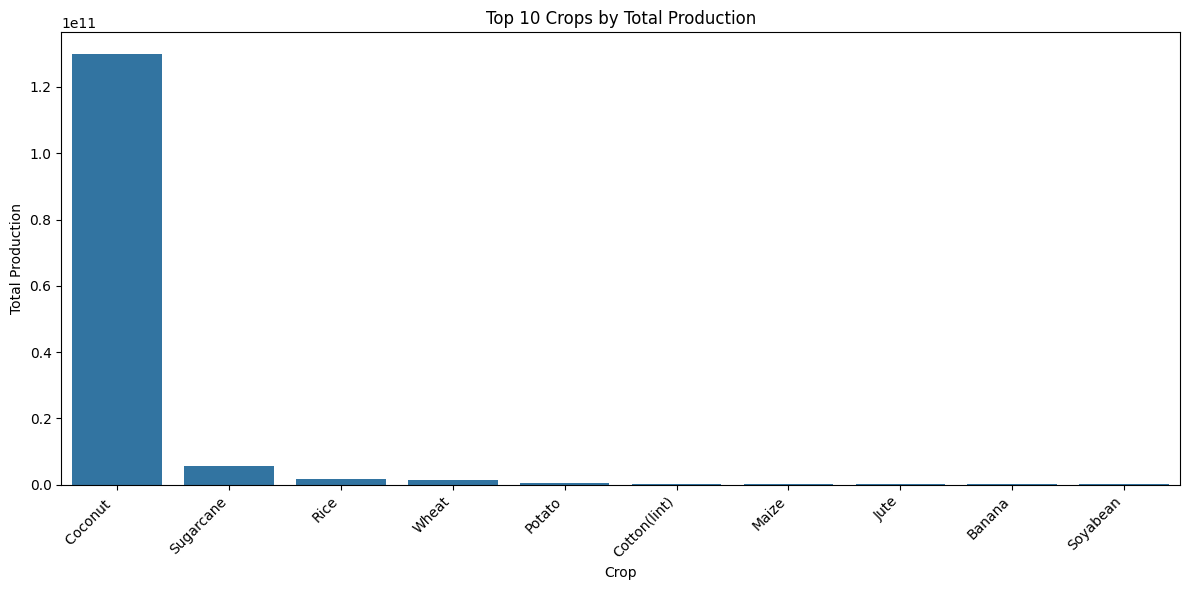

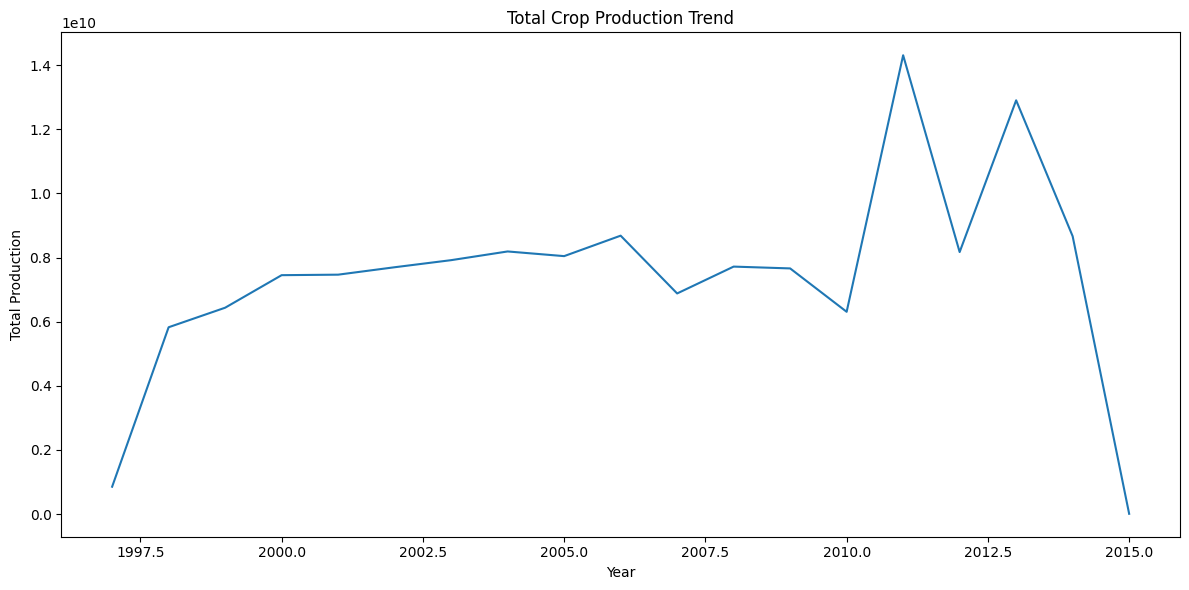

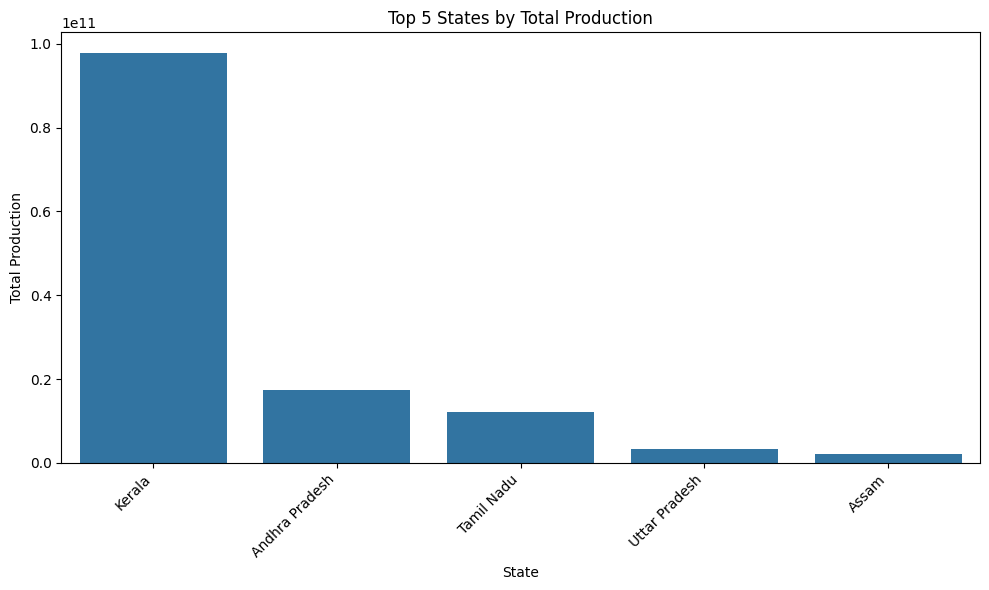

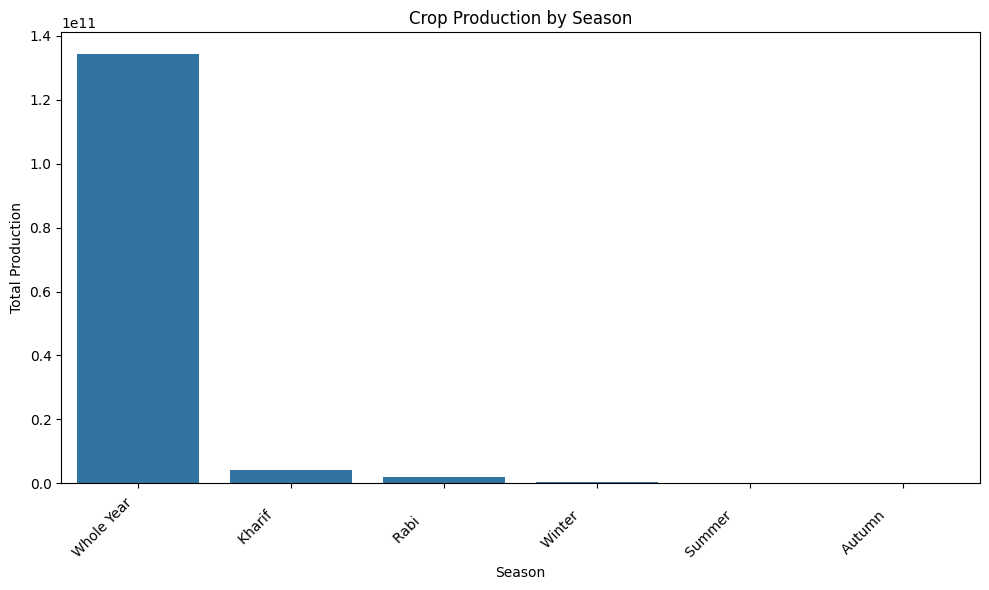

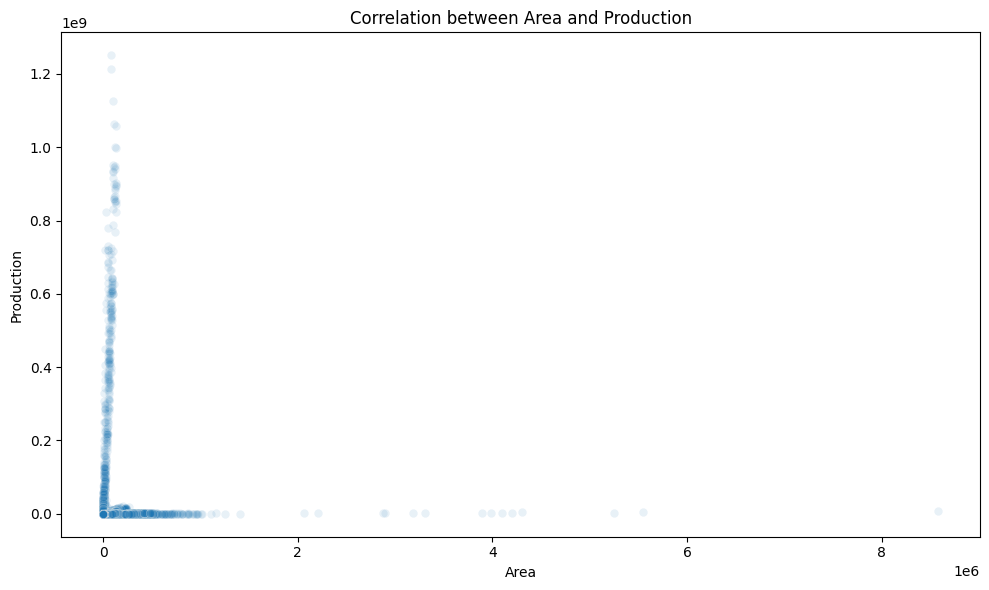

In [ ]:
top_crops = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_crops.index, y=top_crops.values)
plt.title('Top 10 Crops by Total Production')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
plt.close()

yearly_production = df.groupby('Crop_Year')['Production'].sum()
plt.figure(figsize=(12, 6))
plt.plot(yearly_production.index, yearly_production.values)
plt.title('Total Crop Production Trend')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.tight_layout()
plt.show()
plt.close()

top_states = df.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 5 States by Total Production')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
plt.close()

seasonal_production = df.groupby('Season')['Production'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_production.index, y=seasonal_production.values)
plt.title('Crop Production by Season')
plt.xlabel('Season')
plt.ylabel('Total Production')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
plt.close()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area', y='Production', alpha=0.1)
plt.title('Correlation between Area and Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.tight_layout()
plt.show()
plt.close()

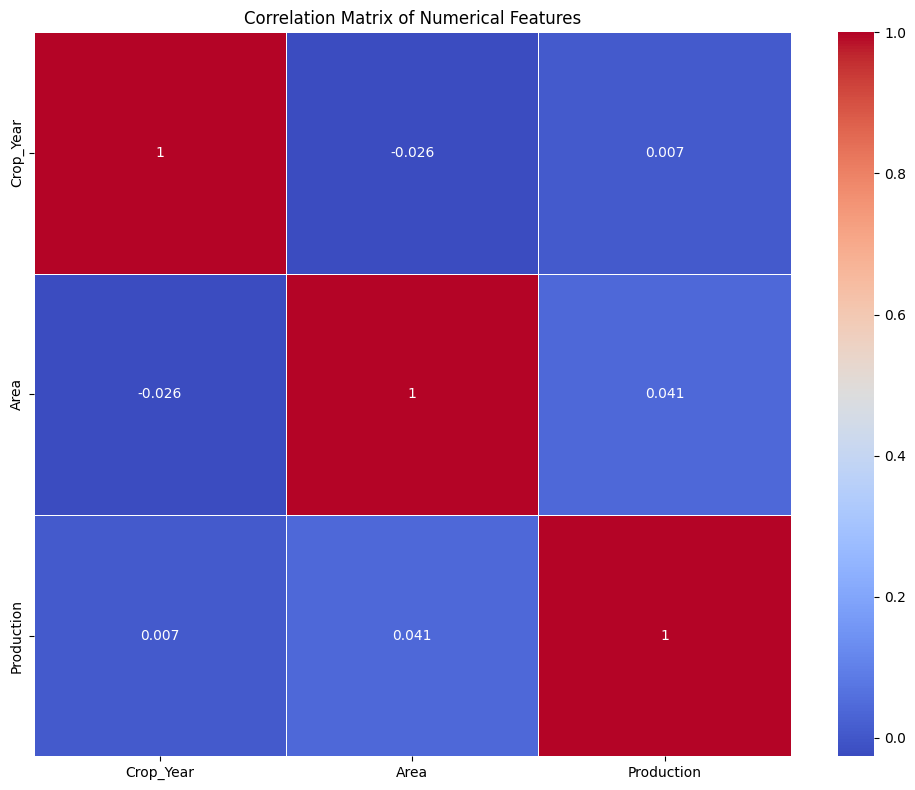

In [ ]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()
plt.close()

Root Mean Squared Error: 5495542.346194468
R-squared Score: 0.9249362467877476


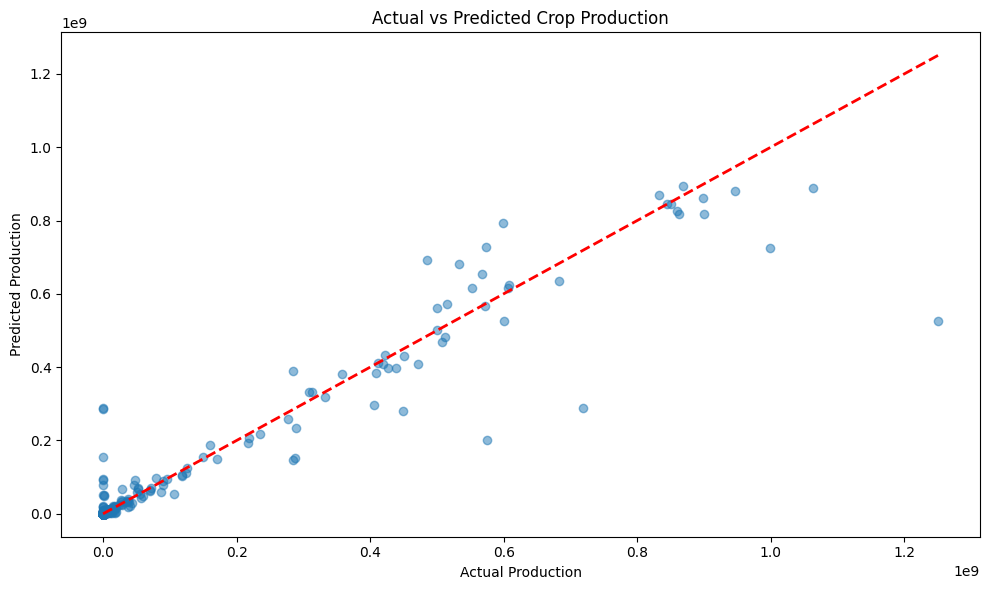

 Actual vs Predicted plots 
Sample Prediction:
Input: {'State_Name': 6.0, 'District_Name': 272.0, 'Crop_Year': 2007.0, 'Season': 2.0, 'Crop': 119.0, 'Area': 5467.0}
Predicted Production: 4676.10


In [ ]:
df = df.dropna()


le = LabelEncoder()
df['State_Name'] = le.fit_transform(df['State_Name'])
df['District_Name'] = le.fit_transform(df['District_Name'])
df['Season'] = le.fit_transform(df['Season'])
df['Crop'] = le.fit_transform(df['Crop'])


features = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area']
target = 'Production'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")


feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Crop Production')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs Predicted Crop Production')
plt.tight_layout()
plt.show()
plt.close()

print(" Actual vs Predicted plots ")


sample = X_test.iloc[0].to_dict()
sample_pred = rf_model.predict(pd.DataFrame([sample]))
print("\
Sample Prediction:")
print(f"Input: {sample}")
print(f"Predicted Production: {sample_pred[0]:.2f}")


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf /content/Copy_of_crop_production.ipynb

[NbConvertApp] Converting notebook /content/Copy_of_crop_production.ipynb to pdf
[NbConvertApp] Support files will be in Copy_of_crop_production_files/
[NbConvertApp] Making directory ./Copy_of_crop_production_files
[NbConvertApp] Making directory ./Copy_of_crop_production_files
[NbConvertApp] Making directory ./Copy_of_crop_production_files
[NbConvertApp] Making directory ./Copy_of_crop_production_files
[NbConvertApp] Making directory ./Copy_of_crop_production_files
[NbConvertApp] Making directory ./Copy_of_crop_production_files
[NbConvertApp] Making directory ./Copy_of_crop_production_files
[NbConvertApp] Writing 58302 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 270225 bytes to /content/Copy